# Introduction to Clustering
>  Before you are ready to classify news articles, you need to be introduced to the basics of clustering. This chapter familiarizes you with a class of machine learning algorithms called unsupervised learning and then introduces you to clustering, one of the popular unsupervised learning algorithms. You will know about two popular clustering techniques - hierarchical clustering and k-means clustering. The chapter concludes with basic pre-processing steps before you start clustering data.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Cluster Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Unsupervised learning: basics

### Unsupervised learning in real world

<p>Which of the following examples can be solved with unsupervised learning?</p>

<pre>
Possible Answers

A list of tweets to be classified based on their sentiment, the data has tweets associated with a positive or negative sentiment.

A spam recognition system that marks incoming emails as spam, the data has emails marked as spam and not spam.

<b>Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.</b>

</pre>

**As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.**

### Pokémon sightings

<p>There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list <code>x</code> and <code>y</code>, respectively.</p>

In [ ]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

Instructions
<ul>
<li>Import the <code>pyplot</code> class from <code>matplotlib</code> library as <code>plt</code>.</li>
<li>Create a scatter plot using the <code>pyplot</code> class.</li>
<li>Display the scatter plot created in the earlier step.</li>
</ul>

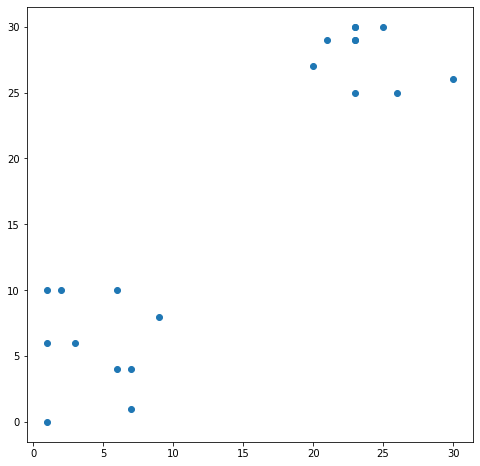

In [ ]:
# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

**Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!**

## Basics of cluster analysis

### Pokémon sightings: hierarchical clustering

<div class=""><p>We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.</p>
<p><code>'x'</code> and <code>'y'</code> are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, <code>df</code>. The following are available for use: <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>, and <code>pandas</code> as <code>pd</code>.</p></div>

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})

Instructions
<ul>
<li>Import the <code>linkage</code> and <code>fcluster</code> libraries.</li>
<li>Use the <code>linkage()</code> function to compute distances using the ward method.</li>
<li>Generate cluster labels for each data point with two clusters using the <code>fcluster()</code> function.</li>
<li>Plot the points with seaborn and assign a different color to each cluster.</li>
</ul>

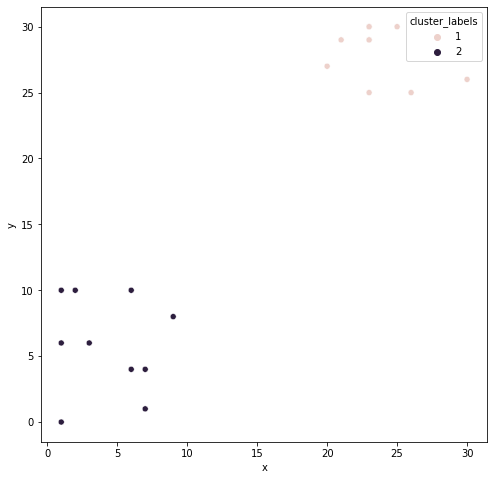

In [ ]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

**Notice that the cluster labels are plotted with different colors. You will notice that the resulting plot has an extra cluster labelled 0 in the legend. This will be explained later in the course.**

### Pokémon sightings: k-means clustering

<div class=""><p>We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.</p>
<p><code>x</code> and <code>y</code> are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, <code>df</code>. The following are available for use: <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>, and <code>pandas</code> as <code>pd</code>.</p></div>

In [ ]:
df = df.astype('float')

Instructions
<ul>
<li>Import the <code>kmeans</code> and <code>vq</code> functions.</li>
<li>Use the <code>kmeans()</code> function to compute cluster centers by defining two clusters.</li>
<li>Assign cluster labels to each data point using <code>vq()</code> function.</li>
<li>Plot the points with seaborn and assign a different color to each cluster</li>
</ul>

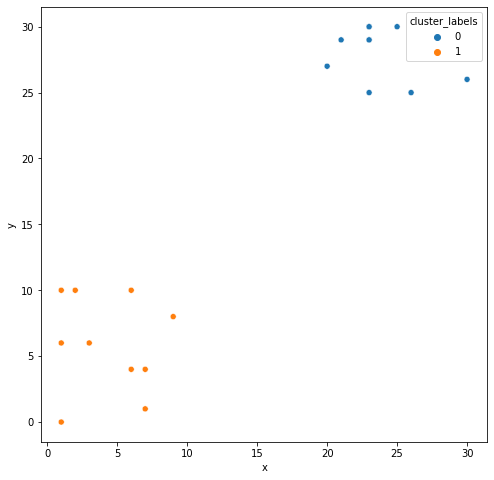

In [ ]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

**Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.**

## Data preparation for cluster analysis

### Normalize basic list data

<p>Now that you are aware of normalization, let us try to normalize some data. <code>goals_for</code> is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the <code>whiten()</code> function.</p>

Instructions
<ul>
<li>Import the <code>whiten</code> function.</li>
<li>Use the <code>whiten()</code> function to standardize the data.</li>
</ul>

In [ ]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


**Notice the scaled values have less variations in them. You will now visualize the data in the next exercise.**

### Visualize normalized data

<p>After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, <code>goals_for</code> and <code>scaled_data</code> are already available to you.</p>

Instructions
<ul>
<li>Use the <code>matplotlib</code> library to plot the original and scaled data.</li>
<li>Show the legend in the plot.</li>
<li>Display the plot.</li>
</ul>

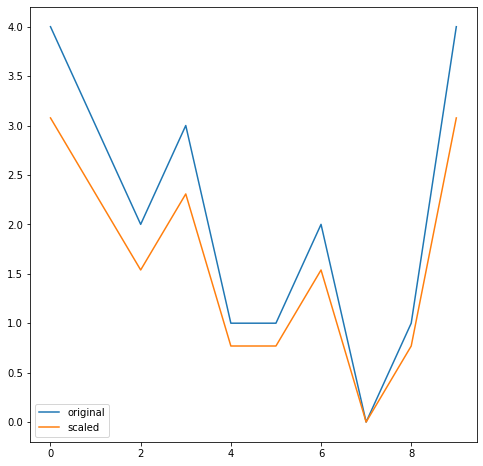

In [ ]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

**Notice the scaled values have lower variations in them.**

### Normalization of small numbers

<p>In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, <code>matplotlib.pyplot</code> is imported as <code>plt</code>.</p>

Instructions
<ul>
<li>Scale the list <code>rate_cuts</code>, which contains the changes in interest rates.</li>
<li>Plot the original data against the scaled data.</li>
</ul>

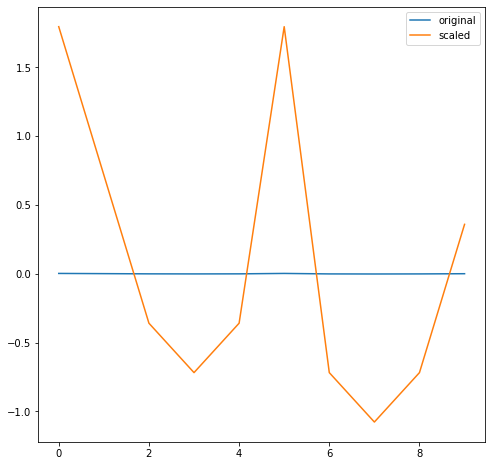

In [ ]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

**Notice how the changes in the original data are negligible as compared to the scaled data**

### FIFA 18: Normalize data

<div class=""><p>FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, <code>eur_wage</code>, the wage of a player in Euros and <code>eur_value</code>, their current transfer market value.</p>
<p>The data for this exercise is stored in a Pandas dataframe, <code>fifa</code>. <code>whiten</code> from <code>scipy.cluster.vq</code>  and <code>matplotlib.pyplot</code> as <code>plt</code> have been pre-loaded.</p></div>

In [ ]:
fifa = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/fifa_1000x185.csv')

Instructions 1/3
<li>Scale the values of <code>eur_wage</code> and <code>eur_value</code> using the <code>whiten()</code> function.</li>

In [ ]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

Instructions 2/3
<li>Plot the scaled wages and transfer values of players using the <code>.plot()</code> method of Pandas.</li>

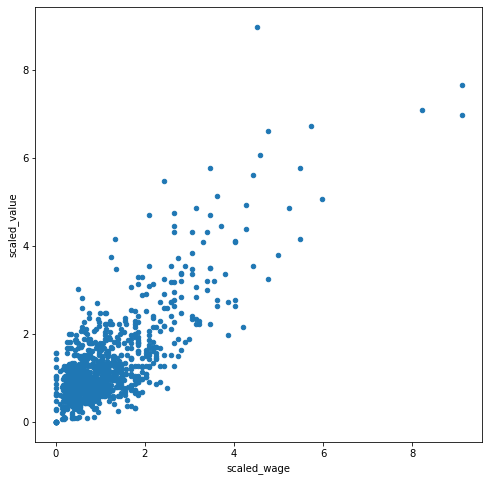

In [ ]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

Instructions 3/3
<li>Check the mean and standard deviation of the scaled data using the <code>.describe()</code> method of Pandas.</li>

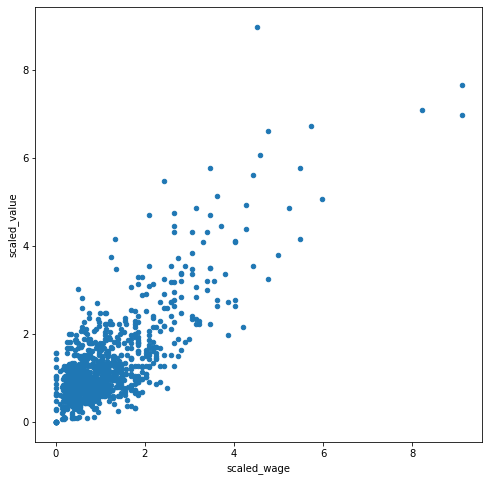

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [ ]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

**As you can see the scaled values have a standard deviation of 1.**